In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import pygal

from bokeh.io import show, output_file, output_notebook, curdoc
from bokeh.models import ColumnDataSource, FactorRange, LabelSet, CustomJS
from bokeh.models.widgets import RangeSlider, Button, DataTable, TableColumn, NumberFormatter
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import inferno, Spectral6
from bokeh.layouts import row, widgetbox

#output_notebook()

In [4]:
df = pd.read_csv("CSV/disasters.csv")
df_sumed = df.groupby(['year']).sum()
print(df)

     year         disaster_type disaster_group  occurrence  Total_deaths  \
0    1900                 Storm        Natural           1        6000.0   
1    1903                 Flood        Natural           2         250.0   
2    1903                 Storm        Natural           1          98.0   
3    1906            Earthquake        Natural           1        2000.0   
4    1906                 Storm        Natural           2         298.0   
5    1909                 Flood        Natural           1          72.0   
6    1909                 Storm        Natural           2         391.0   
7    1910                 Storm        Natural           1          30.0   
8    1913                 Storm        Natural           1         732.0   
9    1915            Earthquake        Natural           1           6.0   
10   1915                 Storm        Natural           1         525.0   
11   1918            Earthquake        Natural           1         116.0   
12   1918   

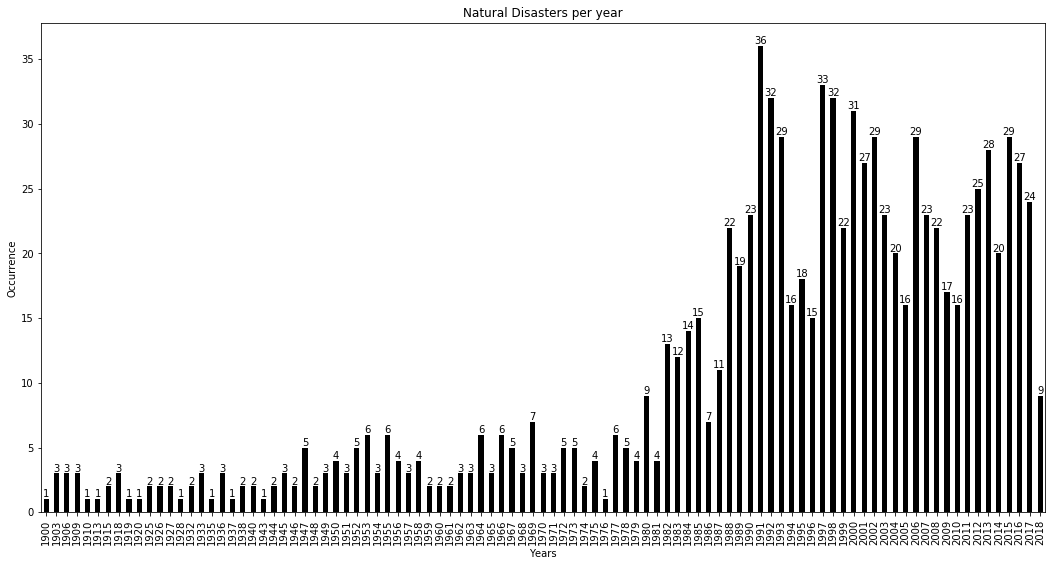

In [5]:
# Graph of Natural Disasters per year
result = list(zip(df_sumed.index, df_sumed.occurrence))

x_labels = [val[0] for val in result]
y_labels = [val[1] for val in result]
plt.figure(figsize=(18, 9))

ax = pd.Series(y_labels).plot(kind='bar', color="Black")
ax.set_xticklabels(x_labels)
ax.set_title("Natural Disasters per year")
ax.set_xlabel("Years")
ax.set_ylabel("Occurrence")

for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')


#plt.show()

In [28]:
output_file("templates/bar_colors.html")
result = list(zip(df_sumed.index, df_sumed.occurrence))

years = list([str(val[0]) for val in result])
occurrences = list([val[1] for val in result])

source = ColumnDataSource(data=dict(years=years, occurrences=occurrences, color=inferno(97)))

p = figure(x_range=years, y_range=(0,40), plot_height=500, plot_width=1000, title="Natural Disasters",
           toolbar_location=None, tools="")

p.vbar(x='years', top='occurrences', width=0.5, color='color', source=source)
p.xaxis.major_label_orientation = math.pi/2

label = LabelSet(x='years', y='occurrences', text='occurrences', level='glyph', text_font_size='0.8em', text_align='center', source=source, render_mode='canvas')

p.xgrid.grid_line_color = None
p.add_layout(label)
show(p)

In [27]:
source = ColumnDataSource(data=dict())

def update():
    current = df[(df['year'] >= slider.value[0]) & (df['year'] <= slider.value[1])].dropna()
    source.data = {
        'year'                    : current.year,
        'disaster_type'           : current.disaster_type,
        'occurrences'             : current.occurrence,
        'Injured'                 : current.Injured,
        'Total_deaths'            : current.Total_deaths,
        'Total_damage'            : current["Total_damage ('000 US$)"]
    }

slider = RangeSlider(title="Year", start=1900, end=2020, value=(0, 2300), step=1, format="0,0")
slider.on_change('value', lambda attr, old, new: update())

columns = [
    TableColumn(field="year", title="Year"),
    TableColumn(field="disaster_type", title="Disaster type"),
    TableColumn(field="occurrences", title="Occurrence"),
    TableColumn(field="Injured", title="Injured"),
    TableColumn(field="Total_deaths", title="Total deaths"),
    TableColumn(field="Total_damage", title="Total damage ('000 US$)")
]

data_table = DataTable(source=source, columns=columns, width=1000)

controls = widgetbox(slider)
table = widgetbox(data_table)

curdoc().add_root(row(controls, table))
curdoc().title = "Export CSV"

update()
show()

RuntimeError: no display hook installed for notebook type None

In [7]:
line_chart = pygal.Line()
line_chart.title = 'Pygal Chart)'
line_chart.x_labels = map(str, range(2002, 2013))
line_chart.add('Injured', df_sumed['Injured'])
line_chart.render()

b'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" id="chart-516de4f8-b39d-40a1-887d-4387587e4846" class="pygal-chart" viewBox="0 0 800 600"><!--Generated with pygal 2.4.0 (lxml) \xc2\xa9Kozea 2012-2016 on 2018-12-05--><!--http://pygal.org--><!--http://github.com/Kozea/pygal--><defs><style type="text/css">#chart-516de4f8-b39d-40a1-887d-4387587e4846{-webkit-user-select:none;-webkit-font-smoothing:antialiased;font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace}#chart-516de4f8-b39d-40a1-887d-4387587e4846 .title{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:16px}#chart-516de4f8-b39d-40a1-887d-4387587e4846 .legends .legend text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:14px}#chart-516de4f8-b39d-40a1-887d-4387587e4846 .axis text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:10px}#chart-516de4f8-b39d-40a1-887d-4387587e484